I need to predict the average money spent for new customers based on demographic data. The demographic data is in the file AdvWorksCusts and the average money spent is in AW_AveMonthSpend.

I will start loading the required datasets

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

AdvWorksCusts = pd.read_csv('AdvWorksCusts.csv')
AW_AveMonthSpend=pd.read_csv('AW_AveMonthSpend.csv')


Researching the data of AdvWorksCusts

In [41]:
print(AdvWorksCusts.dtypes)

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
dtype: object


In [42]:
AdvWorksCusts.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000
mean,20234.225195,0.673891,1.500999,0.992009,2.006235,78122.511532
std,5342.515987,0.468802,1.138962,1.515048,1.682736,39710.985718
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15604.500000,0.000000,1.000000,0.000000,0.000000,47807.500000
50%,20221.000000,1.000000,2.000000,0.000000,2.000000,76120.000000
75%,24860.500000,1.000000,2.000000,2.000000,3.000000,105194.500000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


Investigating the categorical variables to see which values they have

In [43]:
def count_unique(AdvWorksCusts, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(AdvWorksCusts[col].value_counts())

cat_cols = ['Suffix', 'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode', 
            'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag','NumberCarsOwned','TotalChildren','YearlyIncome','BirthDate']
count_unique(AdvWorksCusts, cat_cols)
print(AdvWorksCusts.describe())



For column Suffix
Jr.    2
Name: Suffix, dtype: int64

For column City
London             379
Paris              344
Beaverton          190
Burien             189
Chula Vista        187
Concord            185
Bellingham         183
Berkeley           179
Burbank            174
Beverly Hills      171
Cliffside          170
Burlingame         169
Bremerton          165
Bellflower         164
Berlin             160
Colma              151
Coronado           118
Shawnee            105
York               104
Hamburg            101
Cranbourne         101
Downey             101
Geelong             99
Sydney              99
Caloundra           98
El Cajon            97
Goulburn            97
Brisbane            96
Townsville          96
Hervey Bay          96
                  ... 
Chehalis             1
College Station      1
Casper               1
Clearwater           1
Chantilly            1
Citrus Heights       1
Barstow              1
Baytown              1
Cedar City           1
Bell Gar

Create the column 'Age' because it can be used to predict the label.

In [45]:
from datetime import date, timedelta
today=date.today()
born=AdvWorksCusts['BirthDate']
from dateutil.relativedelta import relativedelta

today = date.today()

AdvWorksCusts['aniohoy'] = pd.to_datetime('today').year 
AdvWorksCusts['aniohoy']=pd.to_numeric(AdvWorksCusts['aniohoy'])

AdvWorksCusts['born_year']=AdvWorksCusts['BirthDate'].str[:4]
(AdvWorksCusts['born_year'])=pd.to_numeric(AdvWorksCusts['born_year'])

AdvWorksCusts['Age']=AdvWorksCusts['aniohoy']-AdvWorksCusts['born_year']
print(AdvWorksCusts['Age'])


0        53
1        54
2        54
3        51
4        51
5        54
6        54
7        55
8        55
9        55
10       55
11       56
12       51
13       51
14       51
15       40
16       40
17       41
18       41
19       41
20       41
21       74
22       73
23       73
24       73
25       72
26       72
27       72
28       72
29       71
         ..
16489    42
16490    42
16491    76
16492    58
16493    58
16494    58
16495    59
16496    59
16497    59
16498    59
16499    60
16500    60
16501    60
16502    60
16503    60
16504    61
16505    59
16506    59
16507    60
16508    62
16509    63
16510    64
16511    67
16512    72
16513    63
16514    54
16515    83
16516    79
16517    73
16518    74
Name: age, Length: 16519, dtype: int64


Remove duplicates by customer id

In [46]:
print(AdvWorksCusts.shape)
print(AdvWorksCusts.CustomerID.unique().shape)
AdvWorksCusts.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(AdvWorksCusts.shape)
print(AdvWorksCusts.CustomerID.unique().shape)

(16519, 26)
(16404,)
(16404, 26)
(16404,)


Count missing values so I can make a decision about them

In [47]:
print(AdvWorksCusts.head(5))
for col in AdvWorksCusts.columns:
    if AdvWorksCusts[col].dtype == object:
        count = 0
        count = [count + 1 for x in AdvWorksCusts[col] if x ==np.nan ]
        print(col + ' ' + str(sum(count)))
        
        

   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName ...   \
0      3761 N. 14th St          NaN  Rockhampton        Queensland ...    
1           2243 W St.          NaN      Seaford          Victoria ...    
2     5844 Linden Land          NaN       Hobart          Tasmania ...    
3     1825 Village Pl.          NaN   North Ryde   New South Wales ...    
4  7553 Harness Circle          NaN   Wollongong   New South Wales ...    

  Gender MaritalStatus HomeOwnerFlag NumberCarsOwned NumberChildrenAtHome  \
0      M             M             1               0                    0   
1      M             S      

investigate the table AW_AveMonthSpend

In [48]:
print(AW_AveMonthSpend.head(10))

   CustomerID  AveMonthSpend
0       11000             89
1       11001            117
2       11002            123
3       11003             50
4       11004             95
5       11005             78
6       11006             54
7       11007            130
8       11008             85
9       11009             74


In [49]:
print(AW_AveMonthSpend.dtypes)

CustomerID       int64
AveMonthSpend    int64
dtype: object


In [50]:
print(AW_AveMonthSpend.describe())

         CustomerID  AveMonthSpend
count  16519.000000   16519.000000
mean   20234.225195      72.405957
std     5342.515987      27.285370
min    11000.000000      22.000000
25%    15604.500000      52.000000
50%    20221.000000      68.000000
75%    24860.500000      84.000000
max    29482.000000     176.000000


Remove Duplicates by CustomerID

In [51]:
print(AW_AveMonthSpend.shape)
print(AW_AveMonthSpend.CustomerID.unique().shape)
AW_AveMonthSpend.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(AW_AveMonthSpend.shape)
print(AW_AveMonthSpend.CustomerID.unique().shape)

(16519, 2)
(16404,)
(16404, 2)
(16404,)


Merge AW_AveMonthSpend and AdvWorksCusts using CustomerID as the common column

In [52]:
df=pd.merge(AdvWorksCusts,AW_AveMonthSpend,on='CustomerID')
print(df.head(5))

   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria   
2     5844 Linden Land          NaN       Hobart          Tasmania   
3     1825 Village Pl.          NaN   North Ryde   New South Wales   
4  7553 Harness Circle          NaN   Wollongong   New South Wales   

       ...       MaritalStatus HomeOwnerFlag NumberCarsOwned  \
0      ...                   M             1               0   
1      ...                   S             0               1   
2      ...          

Investigate the new df

In [53]:
df.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
aniohoy                  int64
born_year                int64
age                      int64
AveMonthSpend            int64
dtype: object

In [54]:
df.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,aniohoy,born_year,age,AveMonthSpend
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.0,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397,2019.0,1961.554194,57.445806,72.391002
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493,0.0,11.241104,11.241104,27.269921
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,2019.0,1910.000000,39.000000,22.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000,2019.0,1954.000000,49.000000,52.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,2019.0,1963.000000,56.000000,68.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000,2019.0,1970.000000,65.000000,84.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,2019.0,1980.000000,109.000000,176.000000


Visualize bar charts for categorical variables. We wont perform the analisis in variables like Name or Title which dont offer any information to explain the label

In [2]:
def plot_bars(df, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = df[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of buyers by' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of buyers')# Set text for y axis
        plt.show()

plot_cols = ['CountryRegionName', 'Education', 'Occupation','Gender','MaritalStatus','HomeOwnerFlag','NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']
plot_bars(df, plot_cols)  

NameError: name 'df' is not defined

Histograms for numeric variables

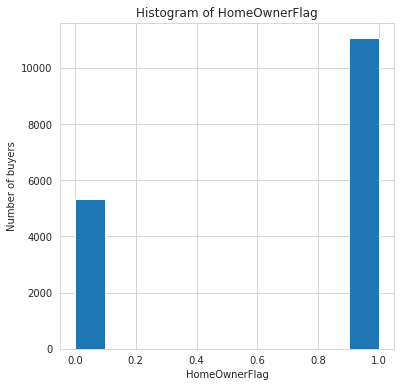

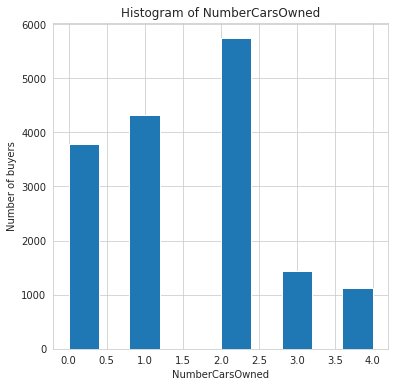

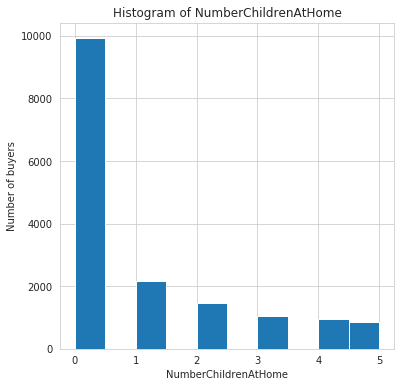

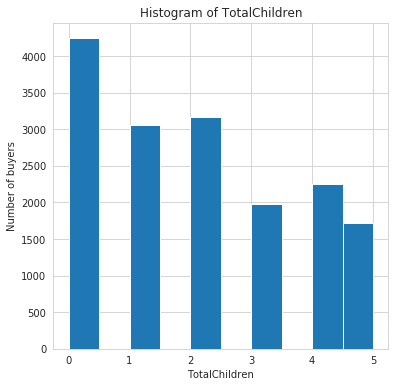

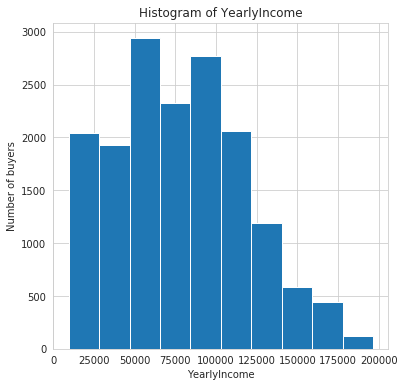

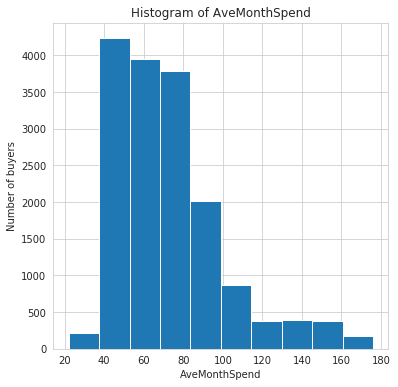

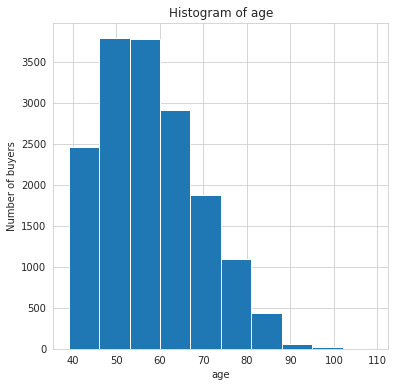

In [56]:
def plot_histogram(df, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        df[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of buyers')# Set text for y axis
        plt.show()
        
num_cols = ['YearlyIncome','AveMonthSpend','Age']    
plot_histogram(df, num_cols)

Count customers with  yearly income =0

In [22]:
count = 0
count = [count + 1 for x in df.YearlyIncome if x ==0 ]
print((count))
        

[]


Kerner density plots for numerical variables

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


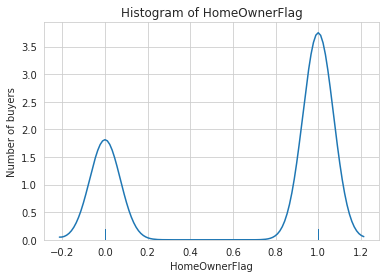

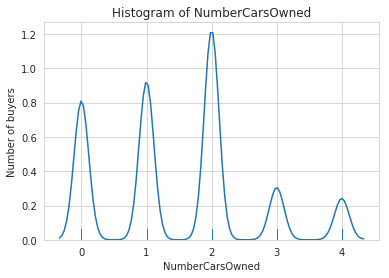

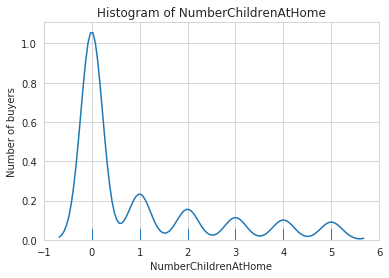

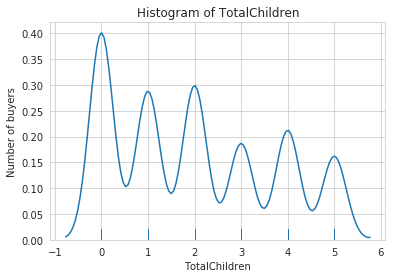

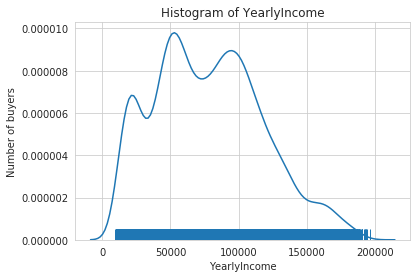

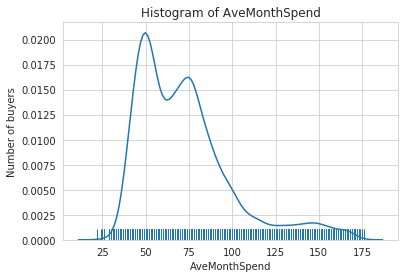

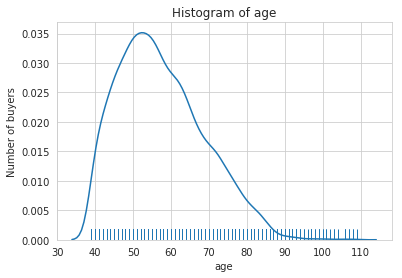

In [57]:
def plot_density_hist(df, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(df[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of buyers')# Set text for y axis
        plt.show()
        
plot_density_hist(df, num_cols) 

YearlyIncome, age and AveMonthSpend are right skewed

Analizing correlations between the numerical features and the label

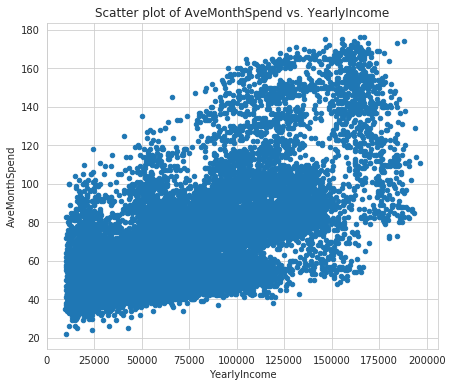

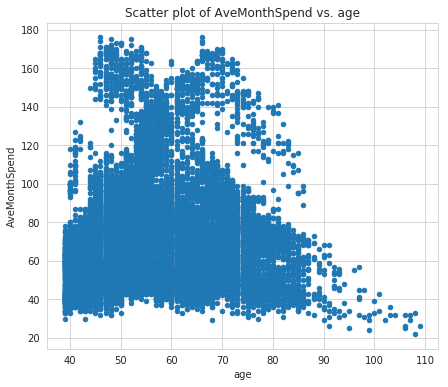

In [58]:
def plot_scatter(df, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        df.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

column=['YearlyIncome','age']
plot_scatter(df, column) 

AveMonthSpend seems to be dependant of the YearlyIncome. Age doesnt seem to be dependant. As there is overplotting we will use transparency

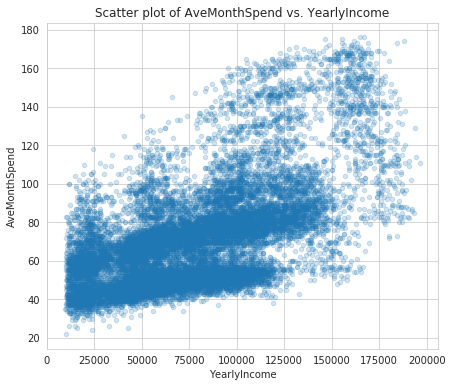

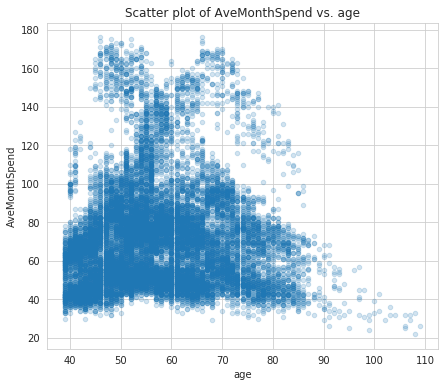

In [59]:
def plot_scatter_t(df, cols, col_y = 'AveMonthSpend', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        df.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

plot_scatter_t(df, column, alpha = 0.2)

Most of the dots in the graph seems to be between 40 and 80 of AveMonthSpend and between 10000 and 125000 of YearlyIncome.

Now we will examine the relations between categorical variables and the label

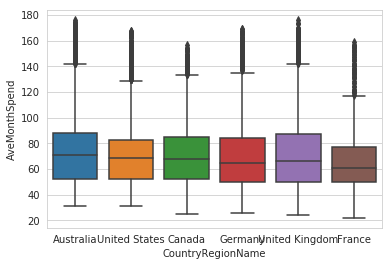

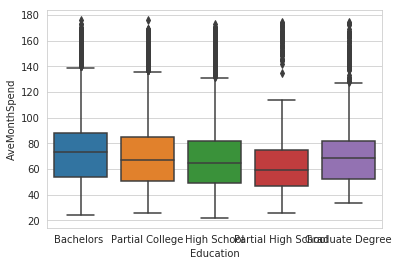

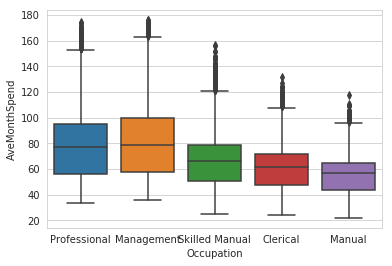

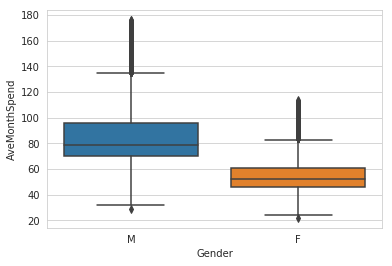

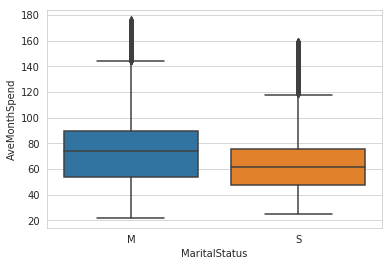

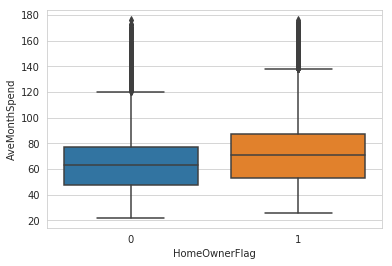

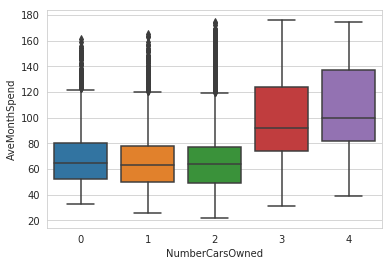

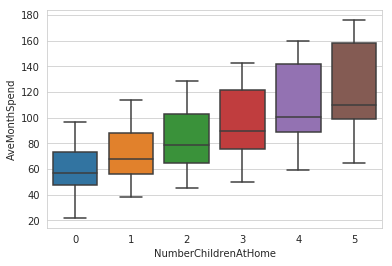

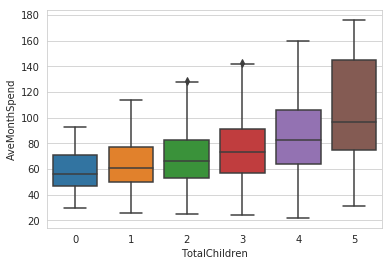

In [31]:
def plot_box(df, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['CountryRegionName', 'Education', 'Occupation','Gender','MaritalStatus','HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']
plot_box(df, cat_cols)   

The Country doesnt seem to explain the AveMonthSpend at all. The Education and Occupation slightly explains the label. Gender, MaritalStatus, HomeOwnerFlag seems to explain pretty well the label. NumberofCarsOwned can explain well if its categories are grouped. Numberofchildrenathome and Total children seem to explain pretty well too, but they seem to be correlated because they have similar graphs. I would prefer to use TotalChildren because in the bar charts the number of cases are similar for each class

I will find the correlation coeficient

In [32]:
df.corr(method ='pearson')

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,aniohoy,born_year,age,AveMonthSpend
CustomerID,1.000000,-0.123425,0.004475,-0.018401,-0.017605,-0.058799,NaN,0.012384,-0.012384,-0.025848
HomeOwnerFlag,-0.123425,1.000000,-0.054155,0.133771,0.185715,0.074910,NaN,-0.107562,0.107562,0.133420
NumberCarsOwned,0.004475,-0.054155,1.000000,0.424284,0.394726,0.345084,NaN,-0.185064,0.185064,0.347668
NumberChildrenAtHome,-0.018401,0.133771,0.424284,1.000000,0.647472,0.365416,NaN,-0.005090,0.005090,0.730177
TotalChildren,-0.017605,0.185715,0.394726,0.647472,1.000000,0.362473,NaN,-0.493535,0.493535,0.500146
YearlyIncome,-0.058799,0.074910,0.345084,0.365416,0.362473,1.000000,NaN,-0.163434,0.163434,0.607301
aniohoy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
born_year,0.012384,-0.107562,-0.185064,-0.005090,-0.493535,-0.163434,NaN,1.000000,-1.000000,-0.015533
age,-0.012384,0.107562,0.185064,0.005090,0.493535,0.163434,NaN,-1.000000,1.000000,0.015533
AveMonthSpend,-0.025848,0.133420,0.347668,0.730177,0.500146,0.607301,NaN,-0.015533,0.015533,1.000000


YearlyIncome and AveMonthSpend have a weak possitive correlation

I will create a model using Occupation, Gender, MaritalStatus, HomeOwnerFlag, NumberCarsOwned, TotalChildren, age and YearlyIncome. I ll need to aggregate NumberCarsOwned when it s more than 3 because I dont have enough samples.

In [60]:
NumberCarsOwned_categories = {0:'0', 1:'1', 
                    2:'2', 3:'3-4',
                    4:'3-4'}
df['NumberCarsOwned'] = [NumberCarsOwned_categories[x] for x in df['NumberCarsOwned']]
df['NumberCarsOwned'].value_counts()

2      5741
1      4325
0      3782
3-4    2556
Name: NumberCarsOwned, dtype: int64

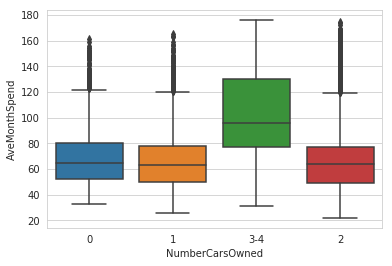

In [61]:
plot_box(df, 'NumberCarsOwned')  

I will apply a log transformation to age, AveMonthSpend and YearlyIncome because they are right skewed and I want them to be more symetric

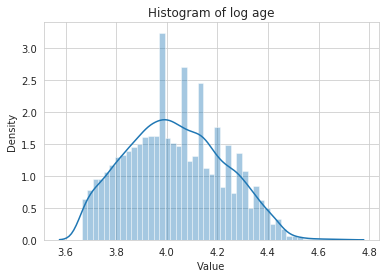

In [65]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')

df['Log_age'] = np.log(df['Age'])
hist_plot(df['Log_age'], 'log age')



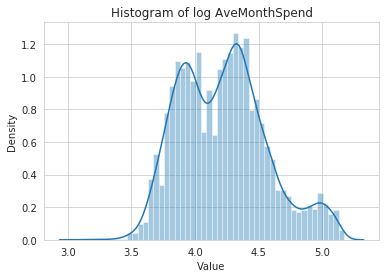

In [66]:
df['Log_AveMonthSpend'] = np.log(df['AveMonthSpend'])
hist_plot(df['Log_AveMonthSpend'], 'log AveMonthSpend')



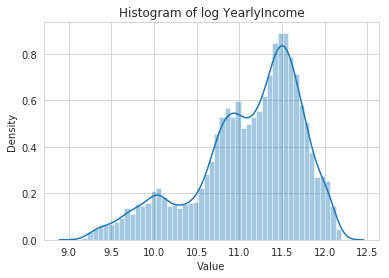

In [67]:
df['Log_YearlyIncome'] = np.log(df['YearlyIncome'])
hist_plot(df['Log_YearlyIncome'], 'log YearlyIncome')

The distributions look more centered than before

I will evaluate the relation of the new numerical variables with the new label

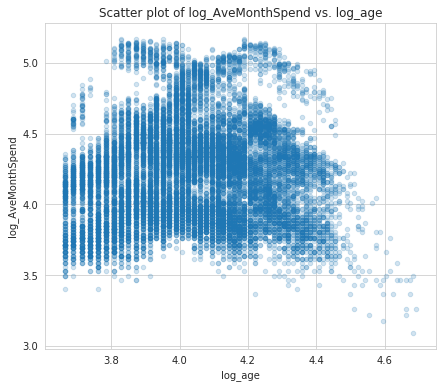

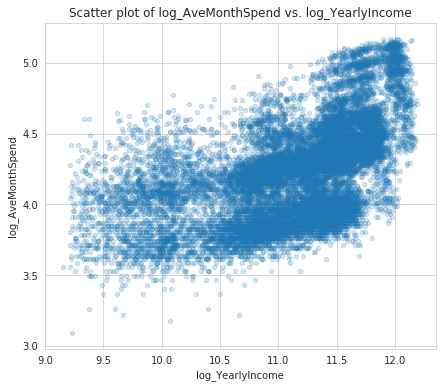

In [68]:
def plot_scatter_t(df, cols, col_y = 'log_AveMonthSpend', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        df.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()
column=['log_age','log_YearlyIncome']
plot_scatter_t(df, column, alpha = 0.2)

The variables seem to be more dependant than before the transformation, especially for YearlyIncome.

I will start building the linear regression model. I need to import the required libraries

In [69]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

I need to transform the categorical values into dummies for the selected variables

In [80]:
   

categorical_columns = [ 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'TotalChildren']
Features = df['Occupation']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()

def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

for col in categorical_columns:
    temp = encode_string(df[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :]) 
   

(16404, 21)
[[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories

Notice that the model matrix now has 21 features which encode the six original categorical features. Now I will concatenate the numerical features

In [81]:
Features = np.concatenate([Features, np.array(df[['Log_age','Log_YearlyIncome']])], axis = 1)

Now I will have to split the database in train and test. I will test it in 8000 cases (approximately half of the rows)

In [141]:

nr.seed(9988)
labels = np.array(df['Log_AveMonthSpend'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 8000)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
print(x_train.shape)
print(Features.shape)

(8404, 23)
(16404, 23)


In [ ]:
Rescaling numeric features

In [121]:
scaler = preprocessing.StandardScaler().fit(x_train[:,21:])
x_train[:,21:] = scaler.transform(x_train[:,21:])
x_test[:,21:] = scaler.transform(x_test[:,21:])
print(x_train.shape)
x_train[:5,:]

(8404, 23)


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.49614495,  0.57771379],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.12840916,  0.29798824],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.0580

I will create the linear regression model minimizing the square error. I wont use intercept because I am working with dummy variables

In [122]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 4.74389356e+10  4.74389356e+10  4.74389356e+10  4.74389356e+10
  4.74389356e+10  7.91038185e+11  7.91038185e+11 -8.87896608e+10
 -8.87896608e+10 -8.02743923e+11 -8.02743923e+11  1.16597386e+11
  1.16597386e+11  1.16597386e+11  1.16597386e+11 -6.35409225e+10
 -6.35409225e+10 -6.35409225e+10 -6.35409225e+10 -6.35409225e+10
 -6.35409225e+10 -1.10392867e-01  1.28067792e-01]


Calculating the metrics for evaluating the model

In [123]:
print(x_train)
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 23)  

[[ 0.          0.          0.         ...  0.          0.49614495
   0.57771379]
 [ 0.          0.          0.         ...  0.          1.12840916
   0.29798824]
 [ 0.          0.          0.         ...  0.          0.05808983
   0.51604506]
 ...
 [ 1.          0.          0.         ...  0.          0.1486971
   0.18407503]
 [ 0.          1.          0.         ...  0.          1.20230808
   0.99566642]
 [ 0.          0.          0.         ...  0.         -0.22358887
  -0.4987307 ]]
Mean Square Error      = 0.018603088880451635
Root Mean Square Error = 0.13639314088491267
Mean Absolute Error    = 0.10807783741987802
Median Absolute Error  = 0.08984522591268251
R^2                    = 0.8431168241346854
Adjusted R^2           = 0.8426841514671365


The metrics seem OK. The adjusted r2 is similar to r2 because there are plenty of cases compared to the number of variables. 

Now we will evaluate the residuals

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


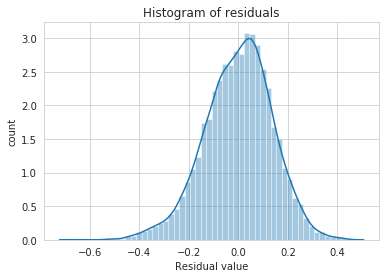

In [124]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score) 

The residuals seem to be small in range and the distribution seems to be symmetric

Now we will perform the QQ Normal plot

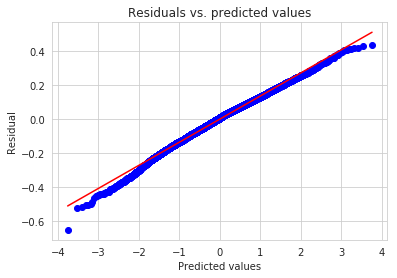

In [125]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)  

The distribution of residuals seem to match with a normal distribution.

Now we will display the plot of residuals vs. predicted values

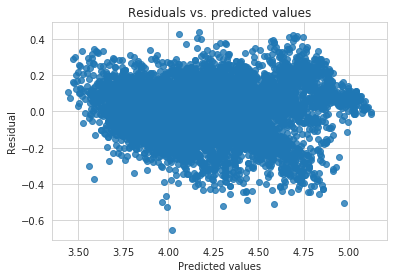

In [126]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score)

The plot seems to be pretty ramdom. 

I will evaluate the model for the label instead of the log of the label

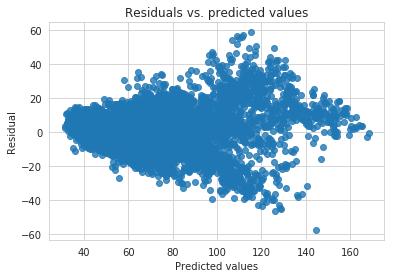

In [127]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform)

Now the graph doesnt sound so promising. The residual seems to be increasing its magnitude when the predicted value increase. There is a cone shape. The model predicts better when the target label is small

In order to reduce overfitting I am going to apply l2 regularization with a Ridge regression

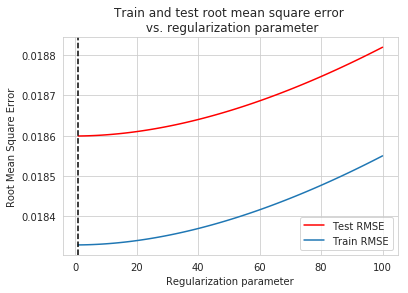

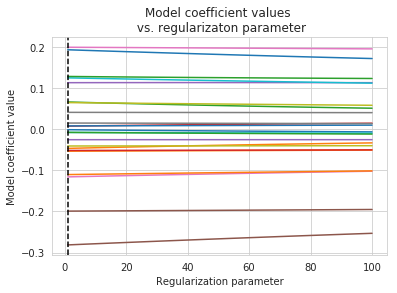

(1, 0.018599345484580854)


In [128]:
def plot_regularization(l, train_RMSE, test_RMSE, coefs, min_idx, title):   
    plt.plot(l, test_RMSE, color = 'red', label = 'Test RMSE')
    plt.plot(l, train_RMSE, label = 'Train RMSE')    
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.legend()
    plt.xlabel('Regularization parameter')
    plt.ylabel('Root Mean Square Error')
    plt.title(title)
    plt.show()
    
    plt.plot(l, coefs)
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.title('Model coefficient values \n vs. regularizaton parameter')
    plt.xlabel('Regularization parameter')
    plt.ylabel('Model coefficient value')
    plt.show()

def test_regularization_l2(x_train, y_train, x_test, y_test, l2):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l2:
        lin_mod = linear_model.Ridge(alpha = reg)
        lin_mod.fit(x_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_score_train))
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(y_test, y_score))
    min_idx = np.argmin(test_RMSE)
    min_l2 = l2[min_idx]
    min_RMSE = test_RMSE[min_idx]
    
    title = 'Train and test root mean square error \n vs. regularization parameter'
    plot_regularization(l2, train_RMSE, test_RMSE, coefs, min_l2, title)
    return min_l2, min_RMSE
     
l2 = [x for x in range(1,101)]
out_l2 = test_regularization_l2(x_train, y_train, x_test, y_test, l2)
print(out_l2)

It seems that the model doesnt need a big regularization coeficient

Now I will evaluate the model using the regularization parameter found with the ridge regression

Mean Square Error      = 0.018599345484580854
Root Mean Square Error = 0.1363794173787997
Mean Absolute Error    = 0.10802165275586866
Median Absolute Error  = 0.08959828203962061
R^2                    = 0.843148392861605


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


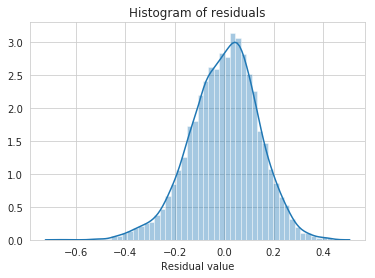

In [129]:
def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))

lin_mod_l2 = linear_model.Ridge(alpha = out_l2[0])
lin_mod_l2.fit(x_train, y_train)
y_score_l2 = lin_mod_l2.predict(x_test)

print_metrics(y_test, y_score_l2)
hist_resids(y_test, y_score_l2)  


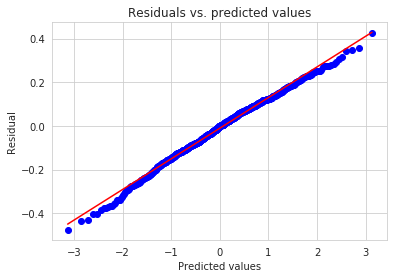

In [98]:
resid_qq(y_test, y_score_l2) 
 

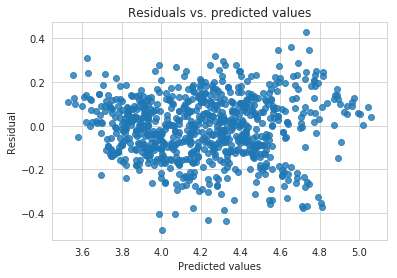

In [99]:
 
resid_plot(y_test, y_score_l2) 

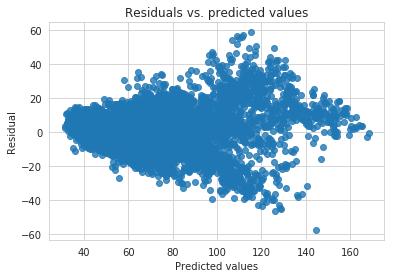

In [130]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform)

The regularization parameter doesnt seem to affect the metrics neither the graphs

Now I will test the model with new input. I need to load the test file and transform the data to be able to test it

In [103]:
AW_test = pd.read_csv('AW_test.csv')
print(AW_test.head())

   CustomerID Title FirstName MiddleName  LastName Suffix  \
0       18988   NaN  Courtney          A     Baker    NaN   
1       29135   NaN      Adam          C     Allen    NaN   
2       12156   NaN    Bonnie        NaN      Raji    NaN   
3       13749   NaN     Julio          C    Alonso    NaN   
4       27780   NaN   Christy          A  Andersen    NaN   

             AddressLine1 AddressLine2        City StateProvinceName  \
0   8727 Buena Vista Ave.          NaN     Fremont        California   
1        3491 Cook Street          NaN       Haney  British Columbia   
2    359 Pleasant Hill Rd          NaN     Burbank        California   
3        8945 Euclid Ave.          NaN  Burlingame        California   
4  42, boulevard Tremblay          NaN   Dunkerque              Nord   

       ...       BirthDate        Education      Occupation Gender  \
0      ...        1/5/1945       Bachelors       Management      F   
1      ...       10/4/1964       Bachelors   Skilled Manual 

In [115]:
AW_test['aniohoy'] = pd.to_datetime('today').year # - AdvWorksCusts['BirthDate'].year
AW_test['aniohoy']=pd.to_numeric(AW_test['aniohoy'])

AW_test['born_year']=AW_test['BirthDate'].str[-4:]
(AW_test['born_year'])=pd.to_numeric(AW_test['born_year'])

AW_test['age']=AW_test['aniohoy']-AW_test['born_year']
print(AW_test['age'])

NumberCarsOwned_categories = {0:'0', 1:'1', 
                    2:'2', 3:'3-4',
                    4:'3-4'}
#AW_test['NumberCarsOwned'] = [NumberCarsOwned_categories[x] for x in AW_test['NumberCarsOwned']]

AW_test['log_age'] = np.log(AW_test['age'])

AW_test['log_YearlyIncome'] = np.log(AW_test['YearlyIncome'])
#y_score_l2_evaluation = lin_mod_l2.predict(x_test)

0      74
1      55
2      85
3      61
4      54
5      62
6      55
7      55
8      53
9      46
10     64
11     63
12     63
13     70
14     40
15     53
16     60
17     62
18     46
19     55
20     46
21     56
22     46
23     53
24     50
25     82
26     49
27     56
28     56
29     51
       ..
470    45
471    50
472    65
473    63
474    50
475    44
476    78
477    74
478    73
479    59
480    56
481    58
482    49
483    50
484    65
485    76
486    70
487    54
488    71
489    61
490    41
491    52
492    75
493    66
494    50
495    50
496    69
497    82
498    62
499    72
Name: age, Length: 500, dtype: int64


In [114]:
print(AW_test['NumberCarsOwned'].value_counts())

2      180
1      124
0      103
3-4     93
Name: NumberCarsOwned, dtype: int64


Create dummy variables for the test

In [144]:
categorical_columns = [ 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'TotalChildren']
Features2 = AW_test['Occupation']
enc = preprocessing.LabelEncoder()
enc.fit(Features2)
Features2 = enc.transform(Features2)
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features2.reshape(-1,1))
Features2 = encoded.transform(Features2.reshape(-1,1)).toarray()

def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    



for col in categorical_columns:
    temp = encode_string(AW_test[col])
    Features2 = np.concatenate([Features2, temp], axis = 1)

print(Features2.shape)
print(Features2[:2, :]) 

(500, 21)
[[0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories

Add the numerical values to the features matrix and scaling

In [145]:
Features2 = np.concatenate([Features2, np.array(AW_test[['log_age','log_YearlyIncome']])], axis = 1)

print(Features2.shape)
#Features2[:,21:] = scaler.transform(Features2[:,21:])





(500, 23)


In [146]:
Features2[:,21:] = scaler.transform(Features2[:,21:])

Predict the lob of the label

In [148]:
y_score_l2_evaluation_log = lin_mod_l2.predict(Features2)
y_score_l2_evaluation = np.exp(y_score_l2_evaluation_log)
print(y_score_l2_evaluation)

import csv

import numpy as np
np.savetxt("Test_results3.csv", y_score_l2_evaluation, delimiter=",", fmt='%s')


[ 55.85125094 106.85026007  55.10952717 105.57518184  54.35882232
  47.66312804  93.43960671 130.02576791  76.22046621  55.68233008
  58.15997261  61.27681993  77.38953053  58.26498641  44.97946321
  48.86119619 104.14393455  79.27957117  97.42924763  50.8988866
  68.03490744  75.00172232 167.50097418  74.31633723  81.36075728
  79.89980926  84.01129153 105.96559308  69.16829968  73.91809988
  62.59119525  72.25956178  45.02319218  84.85583904  86.07618288
  97.76974658 158.64451601  89.12762493  56.51774481  84.67944286
  47.37774733  69.74698834  81.12701444  47.64348651  57.69298779
  68.32910952  55.57337506  64.48056598 123.83010332 103.05488995
  82.76988441  69.75589012  83.32866495  67.00228869  54.63868467
  78.35233392  55.0540953   69.4694845   62.2985967   74.14132693
  51.79996487  65.94417298  86.39471097  66.73482335  46.25141198
  61.93160586  91.06158847 124.03300465  65.59188461  85.77257256
  67.6805986   68.05416518  85.22058527  54.94306469  67.28051691
  77.782189